In [2]:
import numpy as np
import pandas as pd
from plotly.offline import iplot
from surprise import SVD, KNNBasic, CoClustering
from surprise import Dataset
from surprise import Reader
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from surprise import Dataset
from surprise import Reader

In [4]:
data = Dataset.load_builtin('ml-100k')

In [6]:
param_grid = {'n_epochs': [20, 25, 30], 'n_cltr_u': [5, 10, 20], 'n_cltr_i': [5, 10, 15]}
gs = GridSearchCV(CoClustering, param_grid, measures=['rmse'], cv=3)

gs.fit(data)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])
print(gs.cv_results)

0.9782651786635063
{'n_epochs': 30, 'n_cltr_u': 10, 'n_cltr_i': 5}
{'split0_test_rmse': array([0.97847633, 0.98593798, 0.99289182, 0.98854231, 0.99250305,
       1.00036085, 0.98294667, 1.00422503, 1.01111108, 0.98432346,
       0.98894565, 0.98926874, 0.98369511, 0.99265697, 1.00456213,
       0.98537893, 1.00126389, 1.00975181, 0.97836281, 0.98387624,
       0.99107793, 0.98337139, 0.99811882, 1.00553057, 0.98094983,
       0.99843831, 1.00281366]), 'split1_test_rmse': array([0.98596665, 0.99140586, 0.98918189, 0.99009807, 0.99678758,
       1.00044463, 0.97802518, 0.9991624 , 1.00200916, 0.97585735,
       0.99157897, 0.99023641, 0.97898037, 0.99394008, 0.98960536,
       0.98618723, 0.99661129, 1.00553096, 0.98445224, 0.98831125,
       0.98419591, 0.97219587, 0.99808958, 0.98441262, 0.97775927,
       0.99829511, 1.00561516]), 'split2_test_rmse': array([0.9844687 , 0.99068254, 0.98039384, 0.9759279 , 0.9975956 ,
       1.00128448, 0.98109041, 0.9991517 , 1.00577763, 0.98696886,
  

In [7]:
model = CoClustering(**gs.best_params['rmse'])
trainset, testset = train_test_split(data, test_size=.25)
model.fit(trainset)
predictions = model.test(testset)

print(accuracy.rmse(predictions))
print(accuracy.mae(predictions))

<ipython-input-7-2d8815a52ce0>:3: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



RMSE: 0.9738
0.9737808390133599
MAE:  0.7603
0.7603351839815262


In [21]:
df = pd.DataFrame(predictions)
df['erro'] = df['r_ui'] - df['est']
df.describe()

,r_ui,est,erro
count,25000.000000,25000.000000,25000.000000
mean,3.529080,3.534297,-0.005217
std,1.126164,0.762664,0.973786
min,1.000000,1.000000,-4.000000
25%,3.000000,3.078268,-0.606375
50%,4.000000,3.617395,0.042759
75%,4.000000,4.072959,0.643239
max,5.000000,5.000000,4.000000


Text(0, 0.5, 'Frequency')

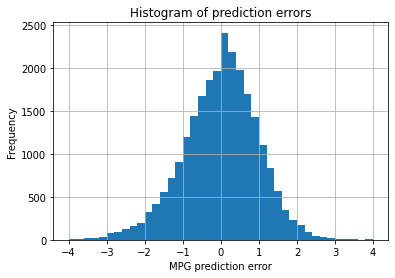

In [20]:
import matplotlib.pyplot as plt
diff = df['erro']
diff.hist(bins = 40)
plt.title('Histogram of prediction errors')
plt.xlabel('MPG prediction error')
plt.ylabel('Frequency')